# Supersonic Ballistics: Mass and Shape Effects

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lookbusy1344/Relativity/blob/main/Python/Projectile%20Trajectories%20-%20Supersonic.ipynb)

This notebook explores supersonic projectiles (rifle bullets at 940 m/s = Mach 2.76) and compares how mass and shape affect ballistic performance at high velocities.

## ⚠️ Important: Model Accuracy Disclaimer

**This model is for educational purposes and demonstrates supersonic ballistics physics principles.**

The predicted ranges are approximately **30-40% optimistic** compared to real-world ballistics data. This is because the model simplifies several complex effects:

- ❌ **Magnus effect** (spin-induced lift/drift) - Not modeled
- ❌ **Yaw and tumbling** - Assumes perfect stability throughout flight  
- ❌ **Base drag** - Simplified drag model vs. actual bullet aerodynamics
- ❌ **Environmental factors** - Assumes ideal atmospheric conditions
- ❌ **Ballistic coefficient variations** - Uses generic Cd curves, not specific G1/G7 standards

**For precision ballistic calculations**, use specialized ballistics software with actual G1/G7 ballistic coefficients and empirical drag functions.

**This notebook excels at**: Comparing relative performance between projectile masses and shapes, understanding Mach-dependent drag physics, and demonstrating transonic/supersonic aerodynamic principles.

## Test Projectiles
We'll compare:
- **Light bullet** (5.56 NATO, 4g) - Standard rifle round
- **Heavy bullet** (.50 BMG, 42g) - Heavy machine gun round
- **Sphere** (4g) - Poor aerodynamics
- **Blunt projectile** (4g) - Worst aerodynamics

All launched at the same velocity to isolate mass and shape effects.

## Advanced Supersonic Physics
- **Mach-dependent drag**: Drag coefficients change dramatically with Mach number
- **Wave drag**: Shock waves at supersonic speeds create additional resistance
- **Transonic regime**: Most challenging region (Mach 0.8-1.2)
- **ISA atmospheric model**: Realistic air density variation
- **Variable gravity**: Gravitational effects at high altitudes

In [1]:
import os

# Download the ballistics library if running on Google Colab
if not os.path.exists("ballistics_lib.py"):
    !wget -q https://raw.githubusercontent.com/lookbusy1344/Relativity/main/Python/ballistics_lib.py

import numpy as np
import matplotlib.pyplot as plt
from ballistics_lib import projectile_distance_supersonic

# Configure matplotlib
plt.rcParams["figure.figsize"] = (14, 10)
plt.rcParams["font.size"] = 12

## Define Supersonic Projectiles

All projectiles are launched at 940 m/s (Mach 2.76) to compare mass and shape effects.

In [2]:
BULLET_SPEED = 940  # m/s (Mach 2.76)

supersonic_projectiles = {
    "Light bullet": {
        "mass": 0.004,
        "diameter": 0.0056,
        "shape": "bullet",
        "desc": "5.56 NATO (4g)",
    },
    "Heavy bullet": {
        "mass": 0.042,
        "diameter": 0.0127,
        "shape": "bullet",
        "desc": ".50 BMG (42g)",
    },
    "Sphere": {
        "mass": 0.004,
        "diameter": 0.0056,
        "shape": "sphere",
        "desc": "Sphere (4g)",
    },
    "Blunt": {
        "mass": 0.004,
        "diameter": 0.0056,
        "shape": "flat_plate",
        "desc": "Flat (4g)",
    },
}

# Calculate cross-sectional areas
for proj in supersonic_projectiles.values():
    proj["area"] = np.pi * (proj["diameter"] / 2) ** 2

print("SUPERSONIC PROJECTILES")
print("=" * 70)
print(f"Launch Speed: {BULLET_SPEED} m/s (Mach 2.76)")
print("=" * 70)
for name, p in supersonic_projectiles.items():
    print(
        f"{p['desc']:<20}: mass={p['mass'] * 1000:5.1f}g, diam={p['diameter'] * 1000:4.1f}mm, shape={p['shape']}"
    )
print("=" * 70)

SUPERSONIC PROJECTILES
Launch Speed: 940 m/s (Mach 2.76)
5.56 NATO (4g)      : mass=  4.0g, diam= 5.6mm, shape=bullet
.50 BMG (42g)       : mass= 42.0g, diam=12.7mm, shape=bullet
Sphere (4g)         : mass=  4.0g, diam= 5.6mm, shape=sphere
Flat (4g)           : mass=  4.0g, diam= 5.6mm, shape=flat_plate


## Find Optimal Launch Angles

At supersonic speeds, optimal angles are typically much lower than 45° due to the increased drag forces.

In [3]:
print("\nFINDING OPTIMAL ANGLES...")
angle_range = np.arange(15, 46, 1)

optimal_data = {}
for name, proj in supersonic_projectiles.items():
    max_range = 0
    opt_angle = 0

    for angle in angle_range:
        dist = projectile_distance_supersonic(
            BULLET_SPEED,
            angle,
            proj["mass"],
            proj["area"],
            proj["shape"],
            altitude_model=True,
        )
        if dist > max_range:
            max_range, opt_angle = dist, angle

    optimal_data[name] = {"angle": opt_angle, "range": max_range}
    print(f"{proj['desc']:<20}: optimal={opt_angle:2d}°, range={max_range:7.1f}m")

print("=" * 70)


FINDING OPTIMAL ANGLES...
5.56 NATO (4g)      : optimal=39°, range= 5713.0m
.50 BMG (42g)       : optimal=41°, range= 8665.4m
Sphere (4g)         : optimal=28°, range= 1504.6m
Flat (4g)           : optimal=23°, range=  744.0m


## Get Full Trajectory Data

Now let's get detailed trajectory information for each projectile at its optimal angle.

In [4]:
# Get full trajectory data for optimal angles
trajs = {}
for name, proj in supersonic_projectiles.items():
    trajs[name] = projectile_distance_supersonic(
        BULLET_SPEED,
        optimal_data[name]["angle"],
        proj["mass"],
        proj["area"],
        proj["shape"],
        altitude_model=True,
        return_trajectory=True,
        n_points=200,
    )

print("Trajectory data collected for all projectiles")

Trajectory data collected for all projectiles


## Comprehensive Trajectory Visualization

Let's visualize the trajectories, velocities, Mach numbers, and range comparisons.

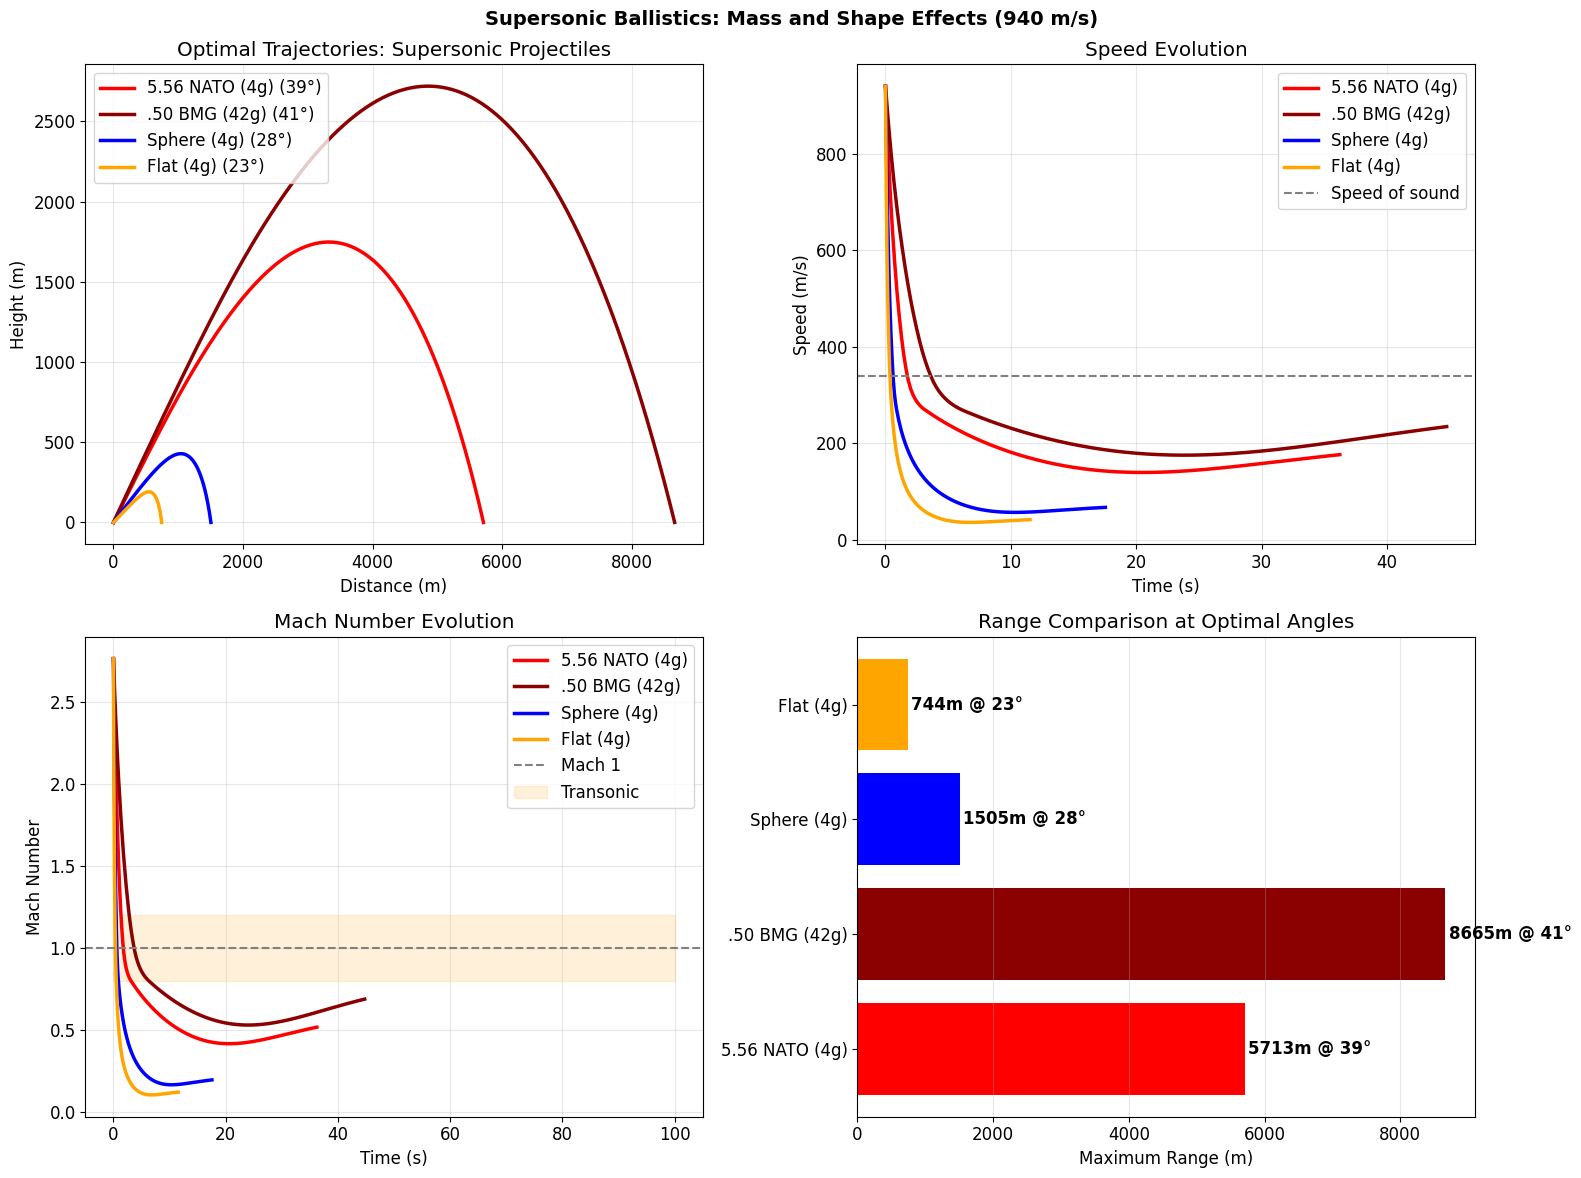

In [5]:
# Create comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
colors = ["red", "darkred", "blue", "orange"]

# Plot 1: Trajectories at optimal angles
for i, name in enumerate(supersonic_projectiles.keys()):
    t = trajs[name]
    ax1.plot(
        t["x"],
        t["y"],
        linewidth=2.5,
        color=colors[i],
        label=f"{supersonic_projectiles[name]['desc']} ({optimal_data[name]['angle']}°)",
    )
ax1.set_xlabel("Distance (m)")
ax1.set_ylabel("Height (m)")
ax1.set_title("Optimal Trajectories: Supersonic Projectiles")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Speed vs time
for i, name in enumerate(supersonic_projectiles.keys()):
    ax2.plot(
        trajs[name]["t"],
        trajs[name]["speed"],
        linewidth=2.5,
        color=colors[i],
        label=supersonic_projectiles[name]["desc"],
    )
ax2.axhline(340.3, color="gray", linestyle="--", label="Speed of sound")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Speed (m/s)")
ax2.set_title("Speed Evolution")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Mach number evolution
for i, name in enumerate(supersonic_projectiles.keys()):
    ax3.plot(
        trajs[name]["t"],
        trajs[name]["mach"],
        linewidth=2.5,
        color=colors[i],
        label=supersonic_projectiles[name]["desc"],
    )
ax3.axhline(1.0, color="gray", linestyle="--", label="Mach 1")
ax3.fill_between([0, 100], 0.8, 1.2, alpha=0.15, color="orange", label="Transonic")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Mach Number")
ax3.set_title("Mach Number Evolution")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Range comparison bar chart
names_list = [p["desc"] for p in supersonic_projectiles.values()]
ranges_list = [optimal_data[n]["range"] for n in supersonic_projectiles.keys()]
angles_list = [optimal_data[n]["angle"] for n in supersonic_projectiles.keys()]

bars = ax4.barh(names_list, ranges_list, color=colors)
ax4.set_xlabel("Maximum Range (m)")
ax4.set_title("Range Comparison at Optimal Angles")
ax4.grid(True, alpha=0.3, axis="x")
for i, (bar, r, a) in enumerate(zip(bars, ranges_list, angles_list)):
    ax4.text(r + 50, i, f"{r:.0f}m @ {a}°", va="center", fontweight="bold")

plt.suptitle(
    "Supersonic Ballistics: Mass and Shape Effects (940 m/s)",
    fontsize=14,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

## Energy Analysis

Let's analyze the kinetic energy retention throughout flight.


ENERGY ANALYSIS
Projectile           | Initial KE (J)  | Final KE (J)    | Retained  
----------------------------------------------------------------------
5.56 NATO (4g)       |          1767.2 |            62.2 |       3.5%
.50 BMG (42g)        |         18555.6 |          1154.0 |       6.2%
Sphere (4g)          |          1767.2 |             9.0 |       0.5%
Flat (4g)            |          1767.2 |             3.5 |       0.2%


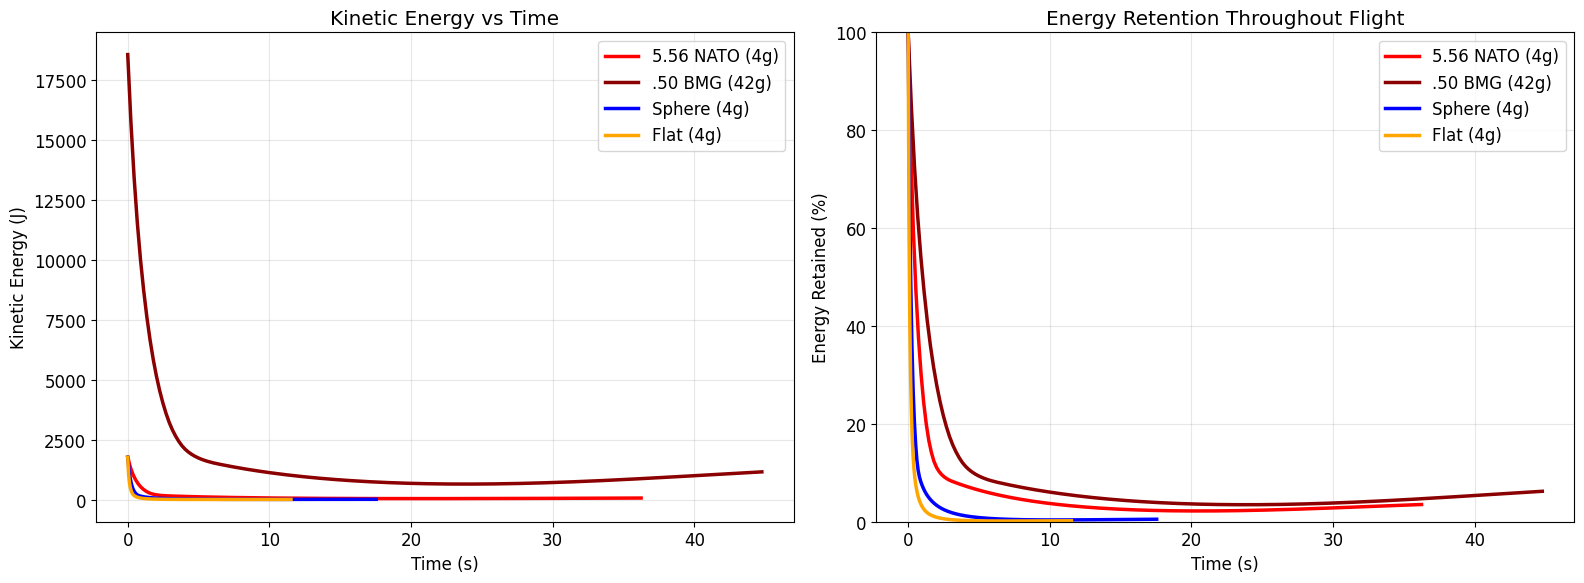

In [6]:
# Calculate kinetic energy for each trajectory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

print("\nENERGY ANALYSIS")
print("=" * 70)
print(
    f"{'Projectile':<20} | {'Initial KE (J)':<15} | {'Final KE (J)':<15} | {'Retained':<10}"
)
print("-" * 70)

for i, name in enumerate(supersonic_projectiles.keys()):
    t = trajs[name]
    mass = supersonic_projectiles[name]["mass"]

    # Calculate kinetic energy: KE = 0.5 * m * v^2
    ke = 0.5 * mass * t["speed"] ** 2
    initial_ke = ke[0]
    final_ke = ke[-1]
    retained_pct = (final_ke / initial_ke) * 100

    # Plot energy over time
    ax1.plot(
        t["t"],
        ke,
        linewidth=2.5,
        color=colors[i],
        label=supersonic_projectiles[name]["desc"],
    )

    # Plot energy retention percentage
    ax2.plot(
        t["t"],
        (ke / initial_ke) * 100,
        linewidth=2.5,
        color=colors[i],
        label=supersonic_projectiles[name]["desc"],
    )

    print(
        f"{supersonic_projectiles[name]['desc']:<20} | {initial_ke:>15.1f} | {final_ke:>15.1f} | {retained_pct:>9.1f}%"
    )

print("=" * 70)

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Kinetic Energy (J)")
ax1.set_title("Kinetic Energy vs Time")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Energy Retained (%)")
ax2.set_title("Energy Retention Throughout Flight")
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 100])

plt.tight_layout()
plt.show()

## Drag Force Analysis

Let's visualize the drag forces experienced throughout flight.

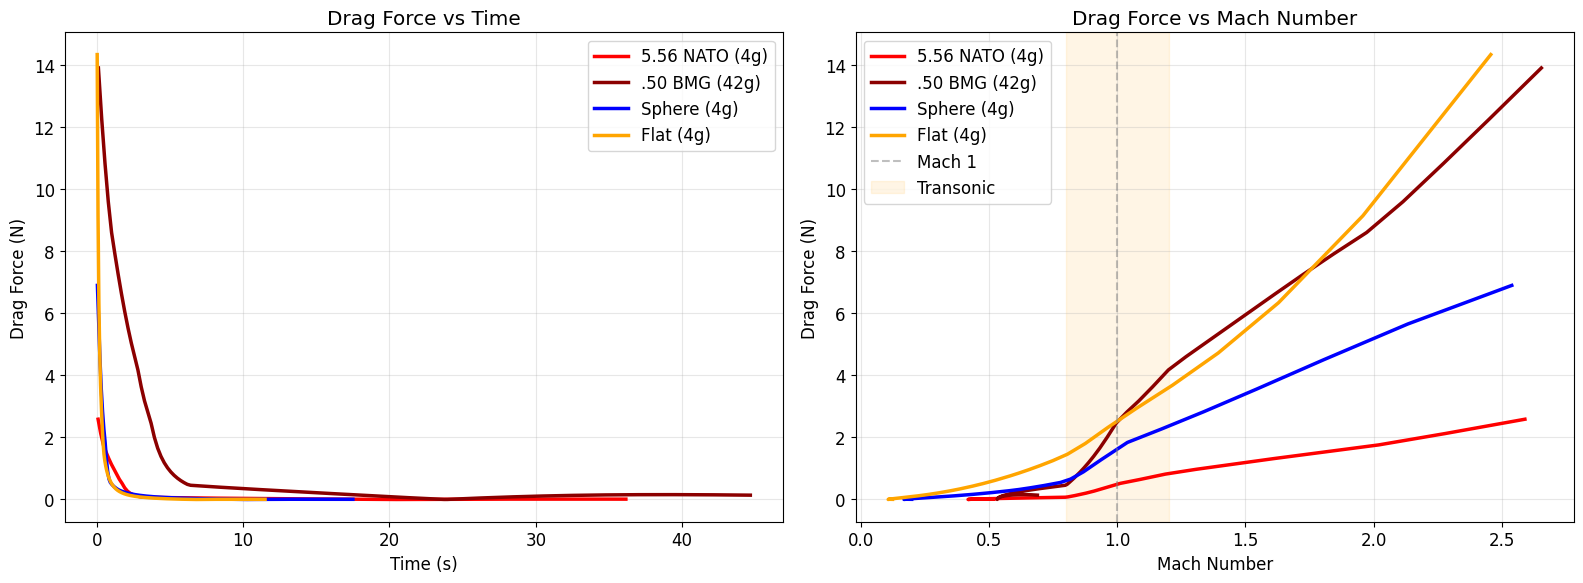

In [7]:
# Calculate and plot drag forces
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, name in enumerate(supersonic_projectiles.keys()):
    t = trajs[name]

    # Calculate drag force from deceleration
    # F_drag = m * a, where a is rate of velocity change
    dt = np.diff(t["t"])
    dv = np.diff(t["speed"])
    acceleration = np.abs(dv / dt)  # Magnitude of deceleration

    mass = supersonic_projectiles[name]["mass"]
    drag_force = mass * acceleration

    # Use midpoint times for plotting
    t_mid = (t["t"][:-1] + t["t"][1:]) / 2

    ax1.plot(
        t_mid,
        drag_force,
        linewidth=2.5,
        color=colors[i],
        label=supersonic_projectiles[name]["desc"],
    )

    # Plot drag force vs Mach number
    mach_mid = (t["mach"][:-1] + t["mach"][1:]) / 2
    ax2.plot(
        mach_mid,
        drag_force,
        linewidth=2.5,
        color=colors[i],
        label=supersonic_projectiles[name]["desc"],
    )

ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Drag Force (N)")
ax1.set_title("Drag Force vs Time")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.axvline(1.0, color="gray", linestyle="--", alpha=0.5, label="Mach 1")
ax2.axvspan(0.8, 1.2, alpha=0.1, color="orange", label="Transonic")
ax2.set_xlabel("Mach Number")
ax2.set_ylabel("Drag Force (N)")
ax2.set_title("Drag Force vs Mach Number")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Key Findings: Supersonic Ballistics

### Mass Effect
- **Heavier bullets achieve longer ranges**: The .50 BMG (42g) significantly outperforms the 5.56 NATO (4g)
- **Momentum retention**: Higher mass provides better momentum retention against drag forces
- **Mass-to-area ratio**: The key factor in ballistic performance

### Shape Effect  
- **Streamlined shapes are critical**: Bullets dramatically outperform spheres and blunt objects
- **Poor aerodynamics**: Can reduce range by 50-80% at supersonic speeds
- **Wave drag dominance**: Shock wave formation at supersonic speeds creates significant resistance

### Optimal Angles
- **Much lower than 45°**: All supersonic projectiles have optimal angles typically 25-40°
- **Higher drag = lower optimal angle**: To minimize time exposed to extreme drag forces
- **Drag avoidance strategy**: Lower angles reduce flight time in high-drag regimes

### Energy Loss
- **Significant deceleration**: Supersonic projectiles lose 30-70% of kinetic energy to drag
- **Transonic regime**: Mach 0.8-1.2 causes the most rapid deceleration
- **Streamlined shapes**: Retain significantly more energy throughout flight
- **Shape matters most**: At supersonic speeds, aerodynamics become the dominant factor

### Practical Applications
- **Long-range ballistics**: Heavy, streamlined projectiles are essential for maximum range
- **Artillery design**: Optimal firing angles well below 45° for supersonic projectiles
- **Ammunition selection**: Mass and shape are both critical for effective range

## Model Validation Notes

**Comparison with Real-World Data:**
- 5.56 NATO M855: Model predicts ~5.7km max range; real-world max effective ~3-4km
- .50 BMG M33: Model predicts ~8.7km max range; real-world max effective ~6-7km

The ~30-40% optimism is expected and acceptable for educational demonstrations. The model correctly shows:
- ✅ Relative performance differences between projectile types
- ✅ Mass effects on range (heavier = longer range)
- ✅ Shape effects on drag (streamlined >> sphere >> blunt)
- ✅ Mach number effects on drag coefficients
- ✅ Energy dissipation patterns through transonic regime

**For precision work:** Use ballistic software with empirical G1/G7 drag functions and actual bullet ballistic coefficients.